# Análise de casos de diabetes

Informações sobre os atributos:


- Pregnancies: expressa o número de gravidezes

- Glucose: Expresa o nível de glicose no sangue

- BloodPressure: Expressa a medição de pressão sanguínea

- SkinThickness: Expressa a espessura da pele

- Insulin: Expressa o nível de insulina no corpo

- BMI: Expressa o índice de massa corporal

- DiabetesPedigreeFunction: Uma função que determina o risco de diabetes tipo 2 com base no histórico familiar. Quanto maior a função, maior o risco de diabetes tipo 2.

- Age: Expressa a idade

- Outcome: Expressa o resultado final  1 para sim e 0 para não

### Leitura do arquivo e formatação

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stat

In [2]:
df = pd.read_csv("/content/diabetes.csv", sep=";")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.columns = ['Gravidez', 'Glicose', 'Pressão', 'Espessura Pele', 'Insulina', 'IMC', 'Função Diabetes', 'Idade', 'Resultado']
df.head()


,Gravidez,Glicose,Pressão,Espessura Pele,Insulina,IMC,Função Diabetes,Idade,Resultado
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Análise Descritiva dos dados

In [5]:
print(df.describe())

         Gravidez     Glicose     Pressão  Espessura Pele    Insulina  \
count  768.000000  768.000000  768.000000      768.000000  768.000000   
mean     3.845052  120.894531   69.105469       20.536458   79.799479   
std      3.369578   31.972618   19.355807       15.952218  115.244002   
min      0.000000    0.000000    0.000000        0.000000    0.000000   
25%      1.000000   99.000000   62.000000        0.000000    0.000000   
50%      3.000000  117.000000   72.000000       23.000000   30.500000   
75%      6.000000  140.250000   80.000000       32.000000  127.250000   
max     17.000000  199.000000  122.000000       99.000000  846.000000   

              IMC  Função Diabetes       Idade   Resultado  
count  768.000000       768.000000  768.000000  768.000000  
mean    31.992578         0.471876   33.240885    0.348958  
std      7.884160         0.331329   11.760232    0.476951  
min      0.000000         0.078000   21.000000    0.000000  
25%     27.300000         0.243750   

In [6]:
# Verificar a quantidade de valores nulos em cada coluna
print(df.isnull().sum())

Gravidez           0
Glicose            0
Pressão            0
Espessura Pele     0
Insulina           0
IMC                0
Função Diabetes    0
Idade              0
Resultado          0
dtype: int64


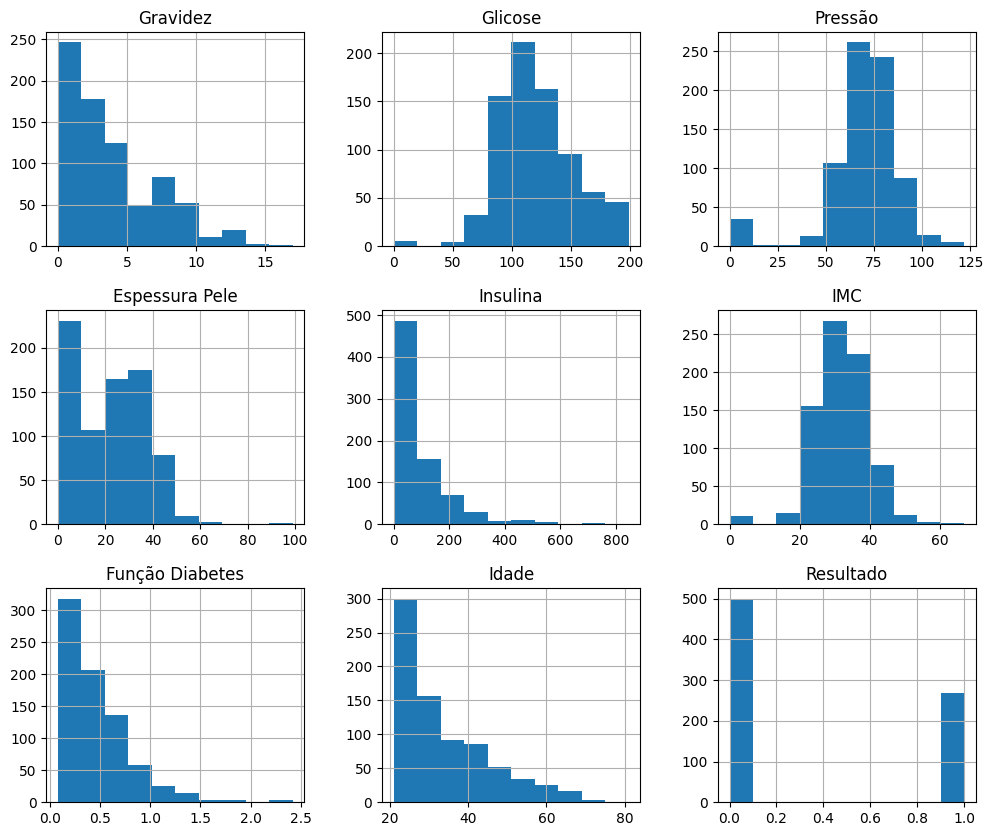

In [7]:
df.hist(figsize=(12, 10))
plt.show()

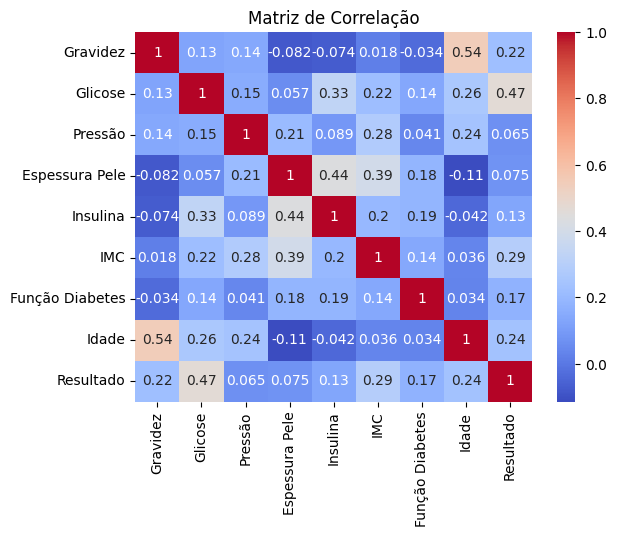

In [8]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

Análise das variáveis em boxplots com e sem outliers

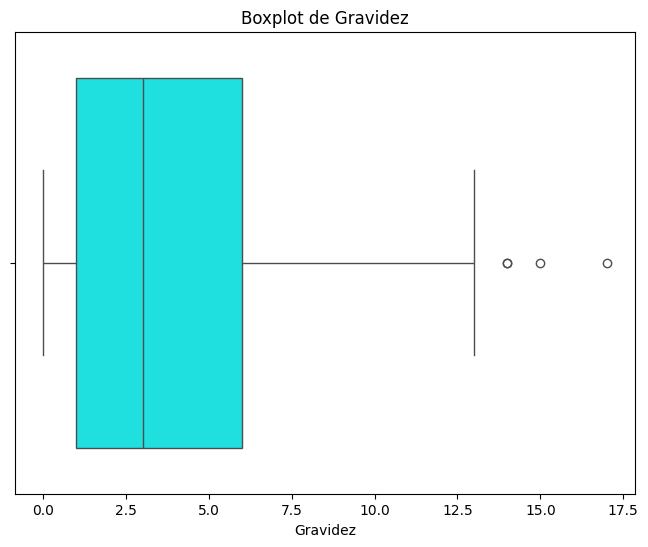

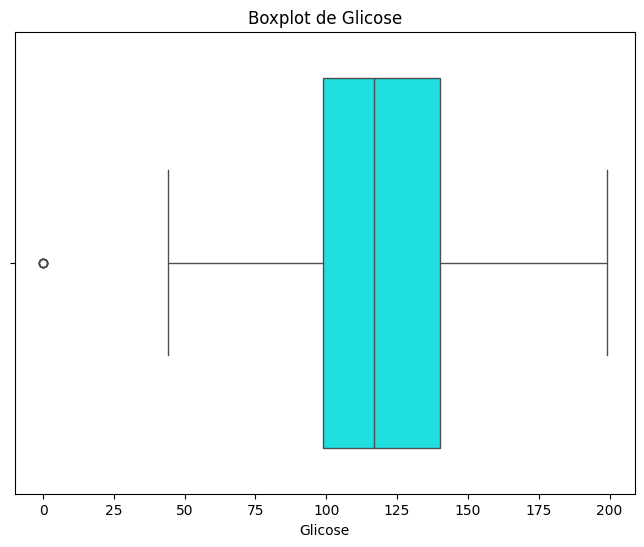

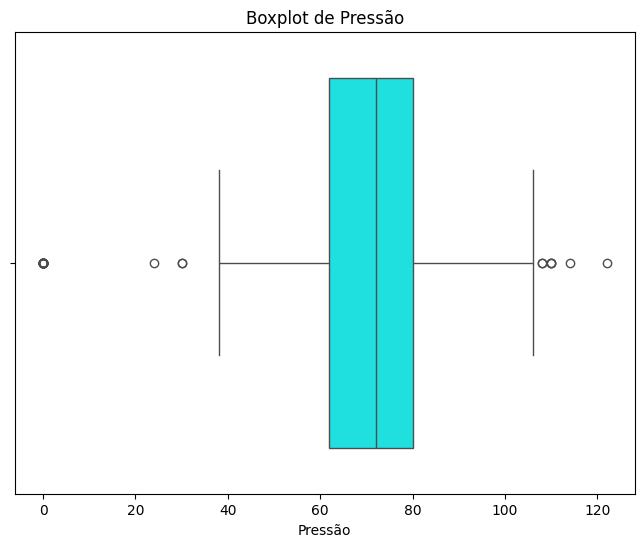

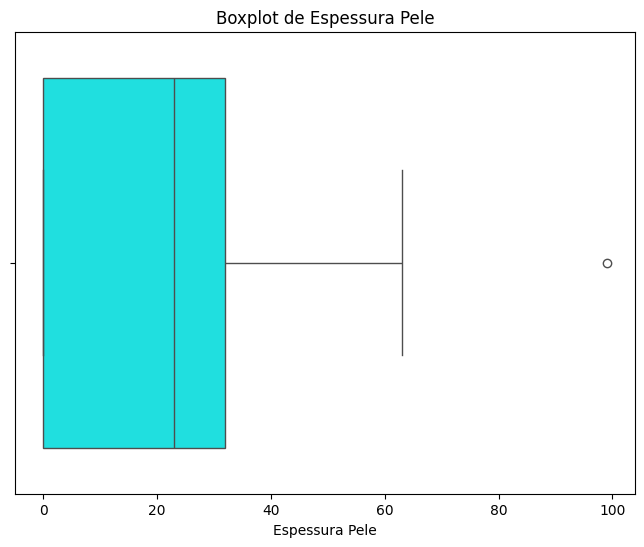

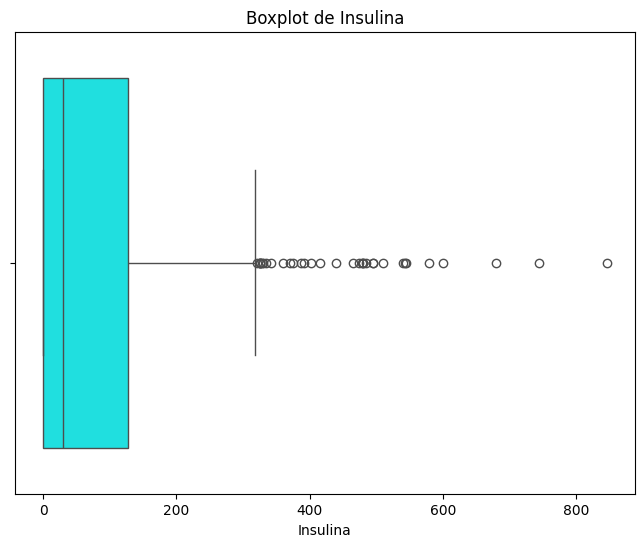

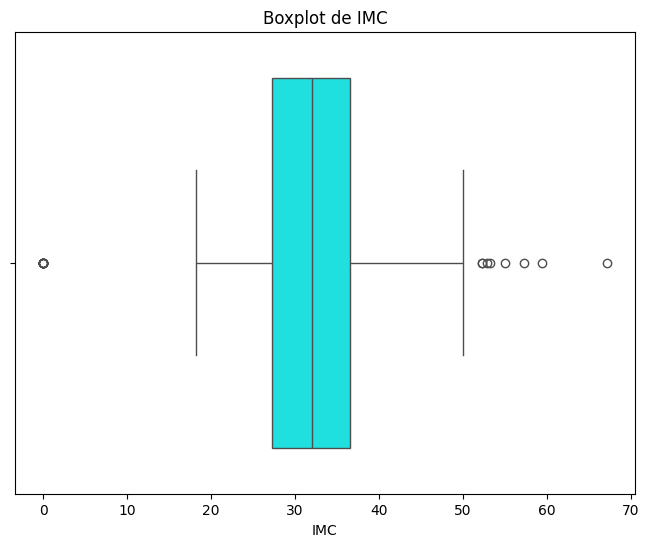

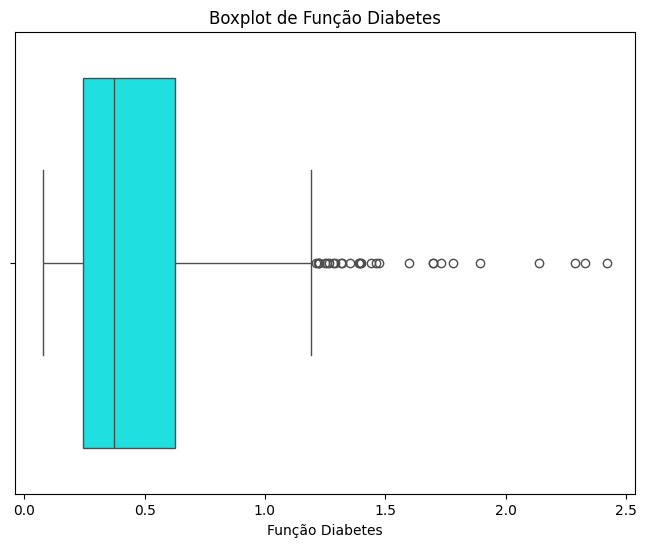

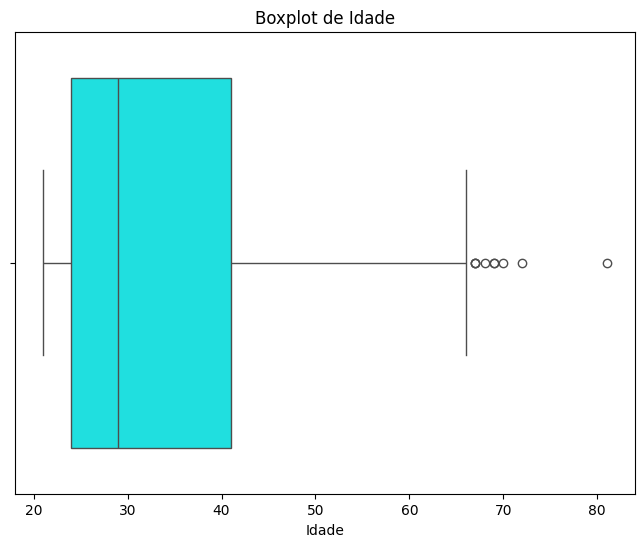

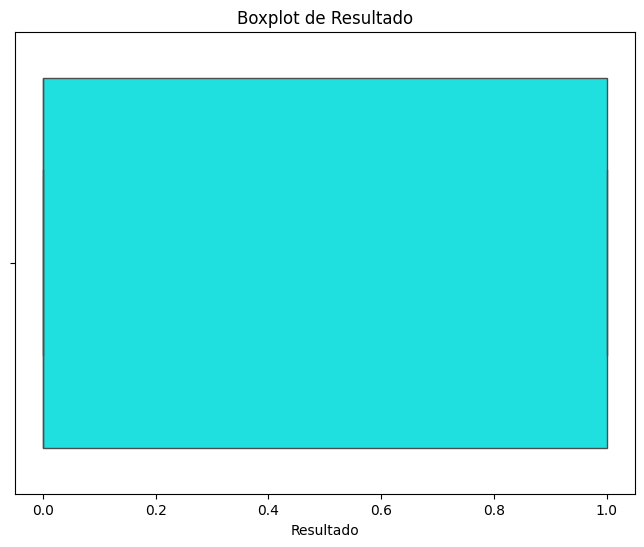

In [9]:
for column in df.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data = df , x = column, color='cyan',showfliers=True)
    plt.title(f'Boxplot de {column}')
    plt.show()


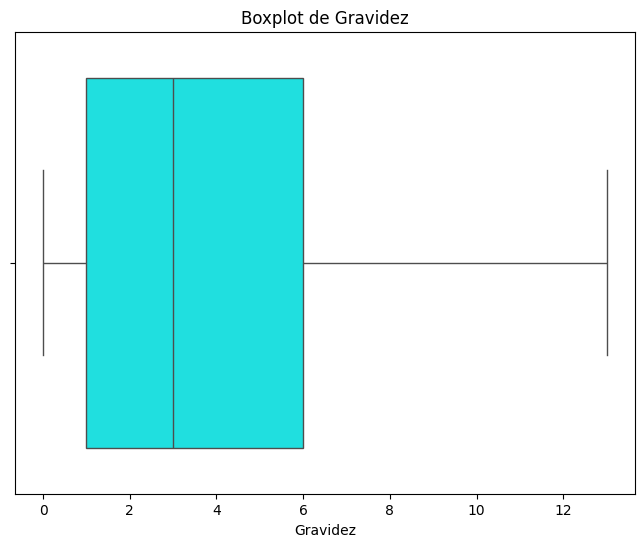

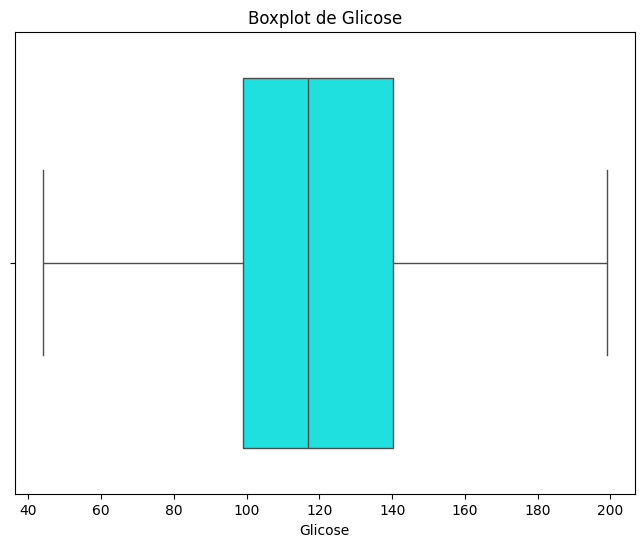

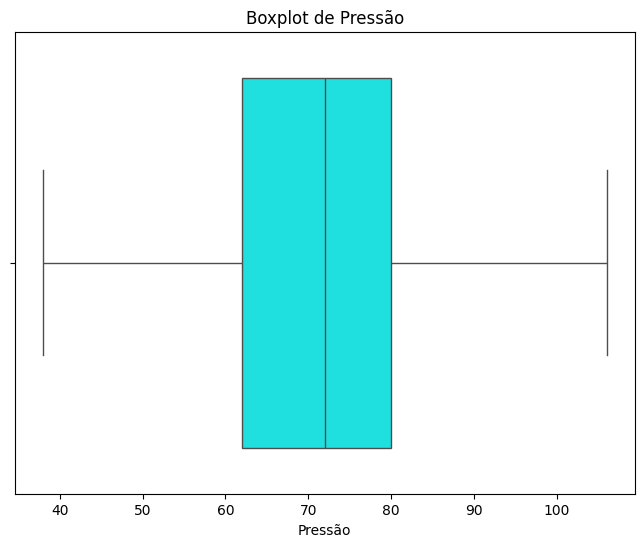

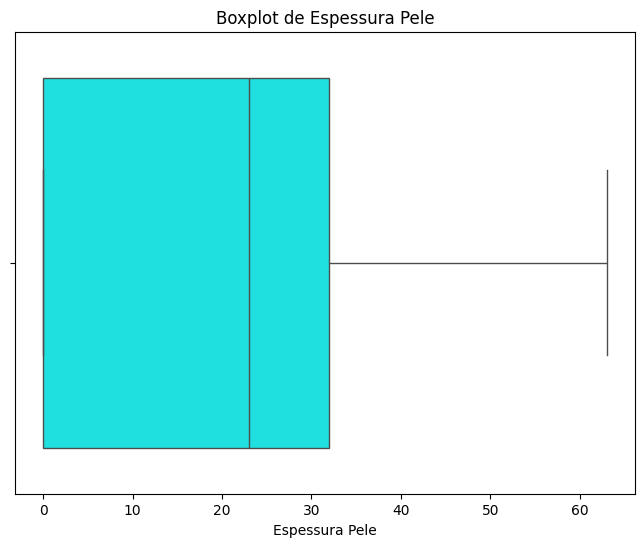

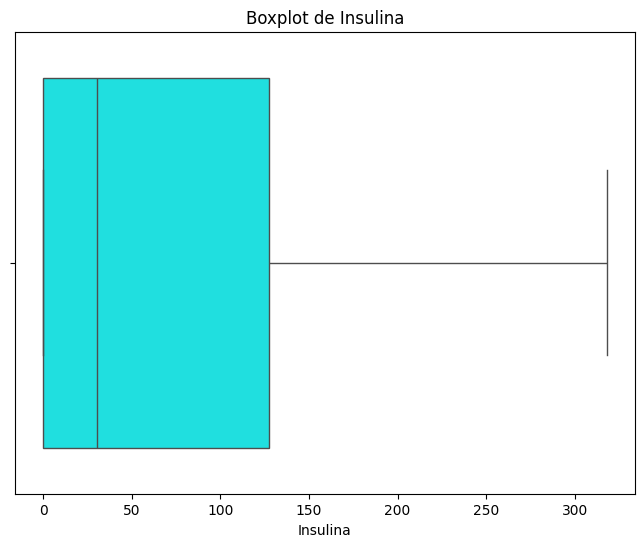

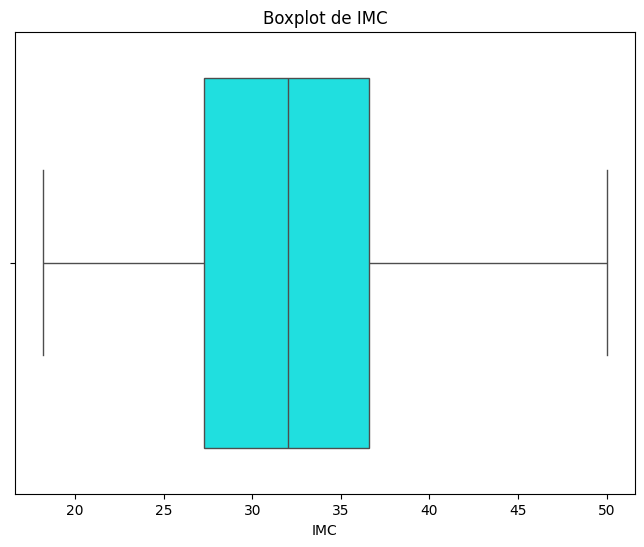

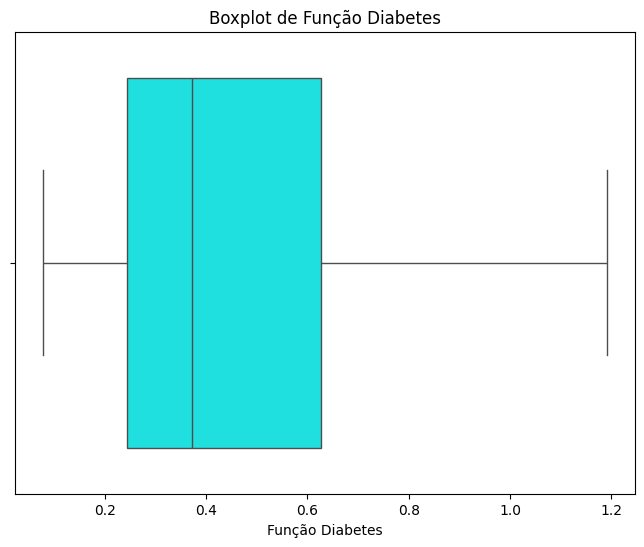

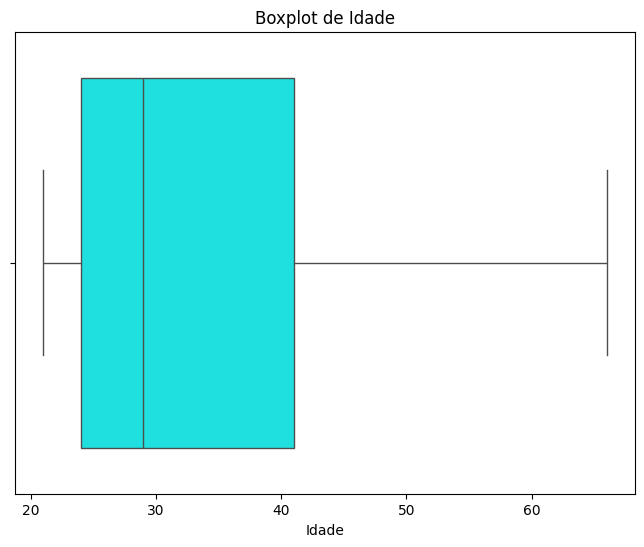

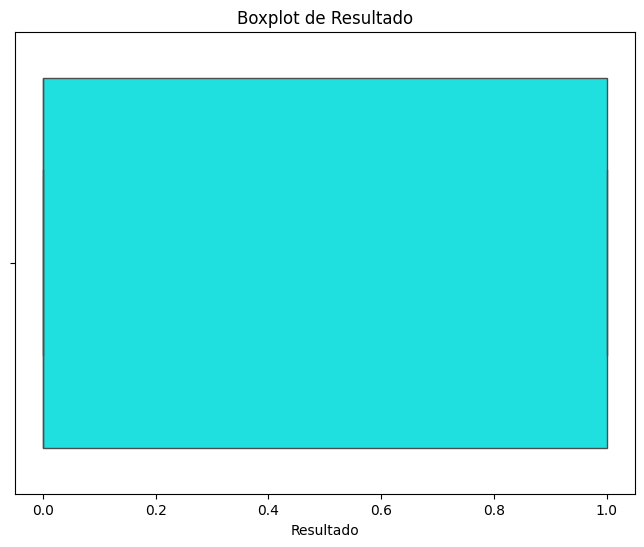

In [9]:
for column in df.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data = df , x = column, color='cyan',showfliers=False)
    plt.title(f'Boxplot de {column}')
    plt.show()


Resultado
0    500
1    268
Name: count, dtype: int64


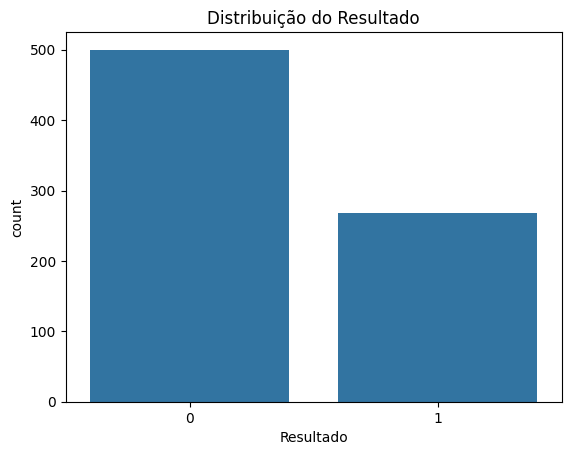

In [10]:
# Análise da distribuição da variável alvo (Resultado)
print(df['Resultado'].value_counts())
sns.countplot(x='Resultado', data=df)
plt.title('Distribuição do Resultado')
plt.show()

# Limpeza dos Dados

Remoção de valores zero que dentro da variável, não significam um valor real

In [11]:
# Remove linhas onde 'Pressão' é 0 e cria um novo dataframe
df_new = df[df['Pressão'] != 0]

In [12]:
# Remove linhas onde 'Glicose' é 0 dentro do novo dataframe
df_new = df[df['Glicose'] != 0]

In [13]:
# Remove linhas onde 'Insulina' é 0 dentro do novo dataframe
df_new = df[df['Insulina'] != 0]

In [15]:
# Remove linhas onde 'IMC' é 0 dentro do novo dataframe
df_new = df[df['IMC'] != 0]

In [16]:
df_new.shape

(757, 9)

# Remoção de outliers

In [17]:
df_copy = df_new.copy()

In [18]:
def find_outlier_iqr(dataset, colname):
    q25, q75 = np.quantile(dataset[colname], 0.25), np.quantile(dataset[colname], 0.75)
    # calcula  IQR
    iqr = q75 - q25
    # calcula outlier cutoff
    cut_off = iqr * 1.5
    # calcula margens inferiores, lower e superiores upper
    lower, upper = q25 - cut_off, q75 + cut_off
    print(' IQR é ',iqr)
   # print('Valor minimo', lower)
   # print('Valor maximo', upper)
    outliers = []

    for i in dataset[colname].values:
      if((i > upper)or(i < lower)):
        outliers.append(i)
    print('O numero de outliers encontrado foi de', len(outliers))
    return lower, upper, outliers

 IQR é  5.0
O numero de outliers encontrado foi de 4
 IQR é  42.0
O numero de outliers encontrado foi de 5
 IQR é  16.0
O numero de outliers encontrado foi de 42
 IQR é  32.0
O numero de outliers encontrado foi de 1
 IQR é  130.0
O numero de outliers encontrado foi de 30
 IQR é  9.100000000000001
O numero de outliers encontrado foi de 8
 IQR é  0.383
O numero de outliers encontrado foi de 28
 IQR é  17.0
O numero de outliers encontrado foi de 8
 IQR é  1.0
O numero de outliers encontrado foi de 0


<Figure size 1000x600 with 0 Axes>

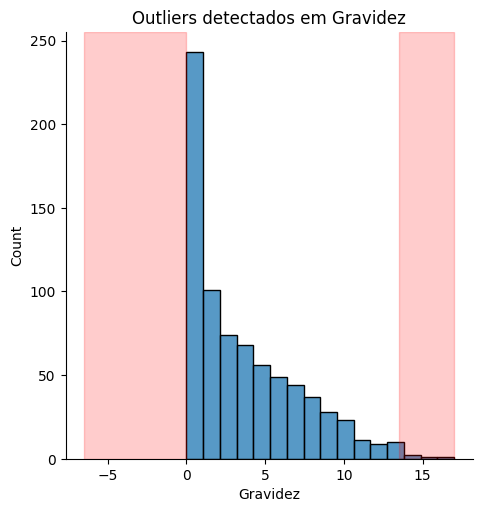

<Figure size 1000x600 with 0 Axes>

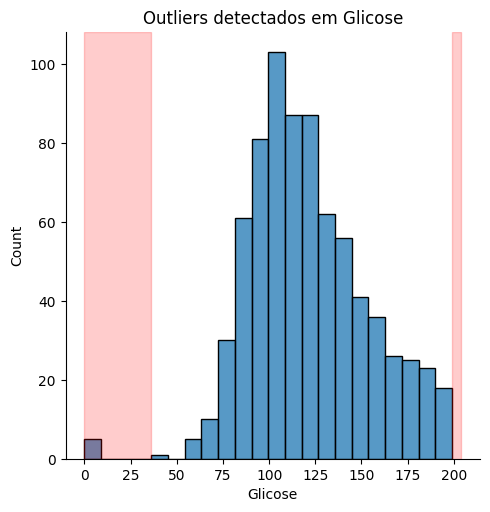

<Figure size 1000x600 with 0 Axes>

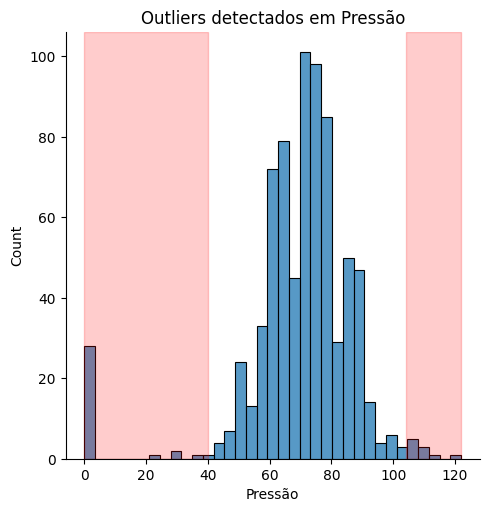

<Figure size 1000x600 with 0 Axes>

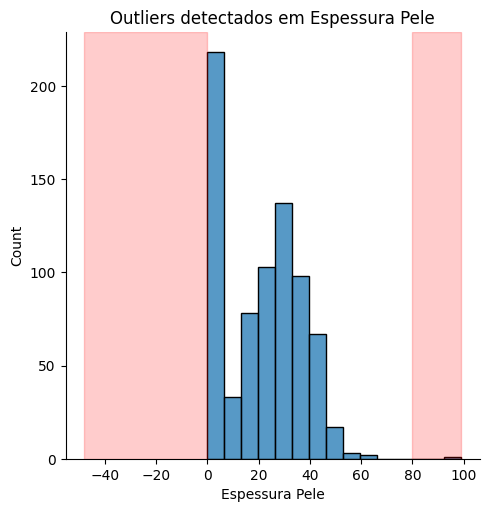

<Figure size 1000x600 with 0 Axes>

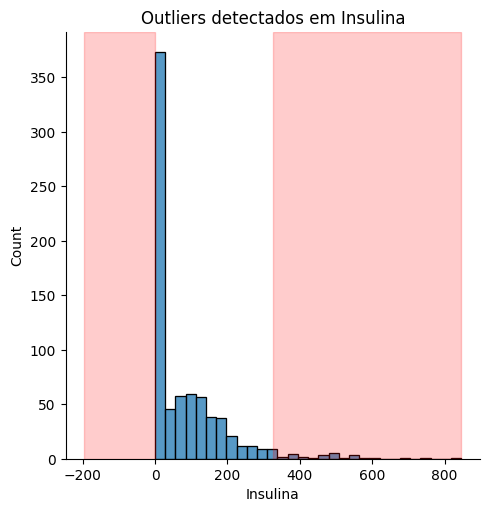

<Figure size 1000x600 with 0 Axes>

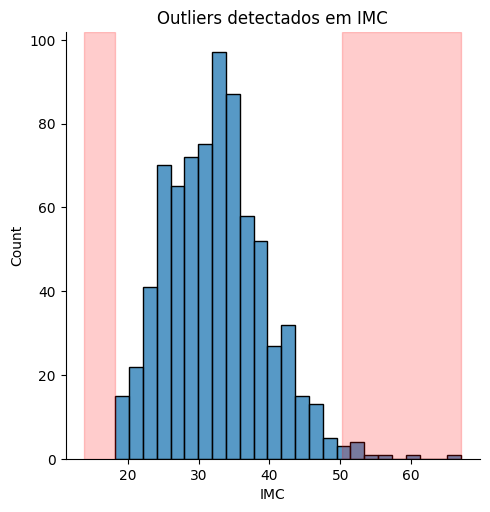

<Figure size 1000x600 with 0 Axes>

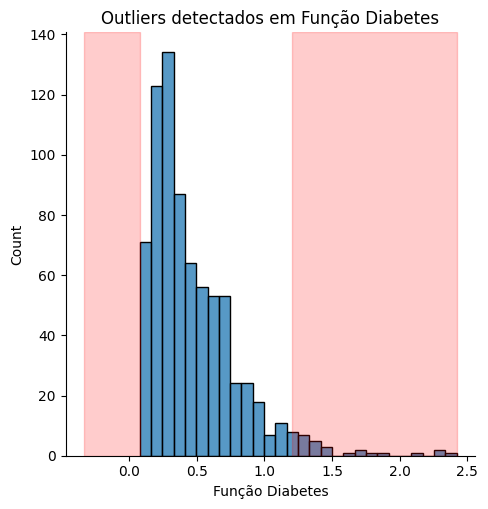

<Figure size 1000x600 with 0 Axes>

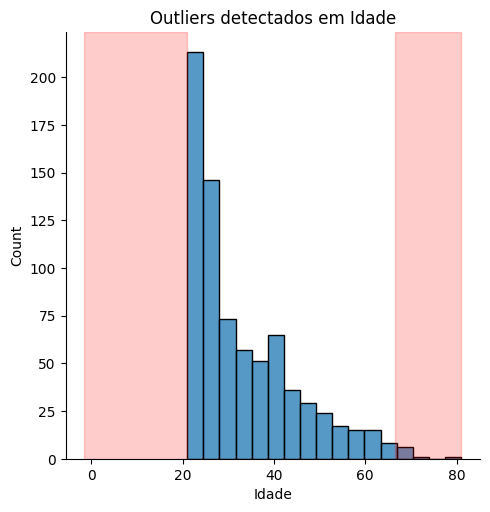

In [19]:
for column in df_copy.select_dtypes(include=np.number).columns:
  lower, upper, out =  find_outlier_iqr(df_copy, column)
  if (len(out) > 0):
    plt.figure(figsize = (10,6))
    sns.displot(df_copy[column], kde=False)
    plt.axvspan(xmin = lower,xmax= df_copy[column].min(),alpha=0.2, color='red')
    plt.axvspan(xmin = upper,xmax= df_copy[column].max(),alpha=0.2, color='red')
    plt.title("Outliers detectados em {}".format(column))

In [20]:
df_no_outliers = df_copy.copy()

for column in df_copy.select_dtypes(include=np.number).columns:
  lower, upper, outliers =  find_outlier_iqr(df_copy, column)
  if (len(outliers) > 0):
    # Remove outliers from the DataFrame
    df_no_outliers = df_no_outliers[~df_no_outliers[column].isin(outliers)]

 IQR é  5.0
O numero de outliers encontrado foi de 4
 IQR é  42.0
O numero de outliers encontrado foi de 5
 IQR é  16.0
O numero de outliers encontrado foi de 42
 IQR é  32.0
O numero de outliers encontrado foi de 1
 IQR é  130.0
O numero de outliers encontrado foi de 30
 IQR é  9.100000000000001
O numero de outliers encontrado foi de 8
 IQR é  0.383
O numero de outliers encontrado foi de 28
 IQR é  17.0
O numero de outliers encontrado foi de 8
 IQR é  1.0
O numero de outliers encontrado foi de 0


In [21]:
print(f"Original DataFrame shape: {df_copy.shape}")
print(f"DataFrame without outliers shape: {df_no_outliers.shape}")

Original DataFrame shape: (757, 9)
DataFrame without outliers shape: (639, 9)


# Análise de Correlações entre variavéis

### Qual a distribuição da idade dos pacientes?


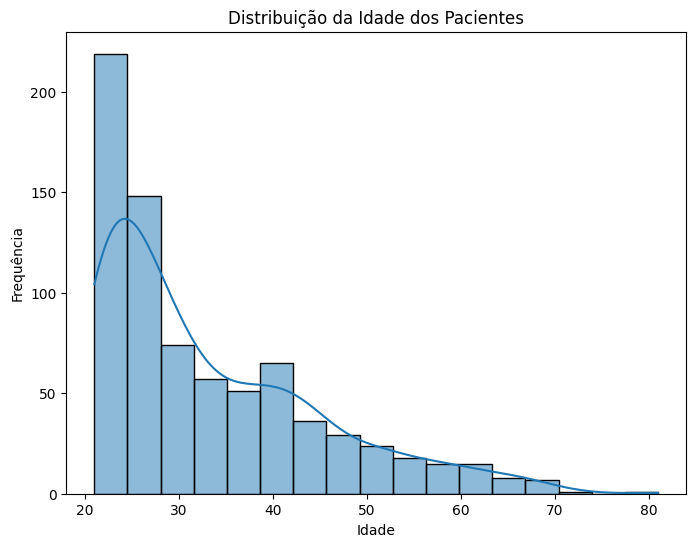

In [ ]:
# Qual a distribuição da idade dos pacientes?
plt.figure(figsize=(8, 6))
sns.histplot(df['Idade'], kde=True)
plt.title('Distribuição da Idade dos Pacientes')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

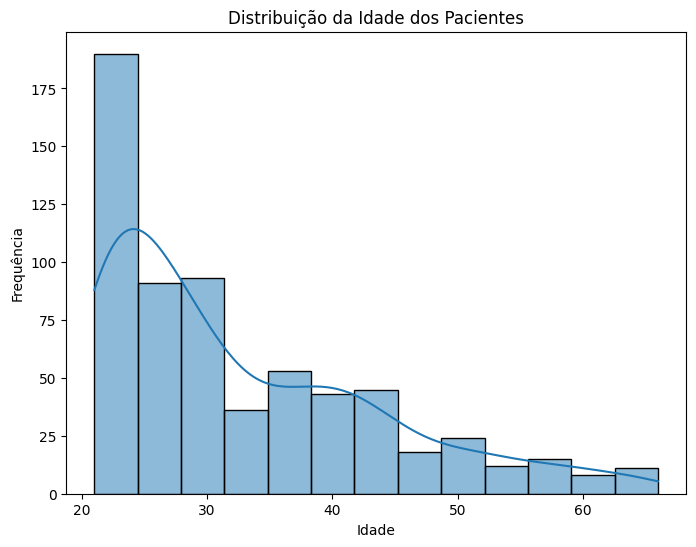

In [24]:
# Qual a distribuição da idade dos pacientes?
plt.figure(figsize=(8, 6))
sns.histplot(df_no_outliers['Idade'], kde=True)
plt.title('Distribuição da Idade dos Pacientes')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

In [ ]:
# Medidas de tendência central e dispersão da idade
print(f"Média da idade: {df['Idade'].mean()}")
print(f"Mediana da idade: {df['Idade'].median()}")
print(f"Desvio padrão da idade: {df['Idade'].std()}")

Média da idade: 33.240885416666664
Mediana da idade: 29.0
Desvio padrão da idade: 11.76023154067868


### Qual a distribuição do IMC na população analisada?

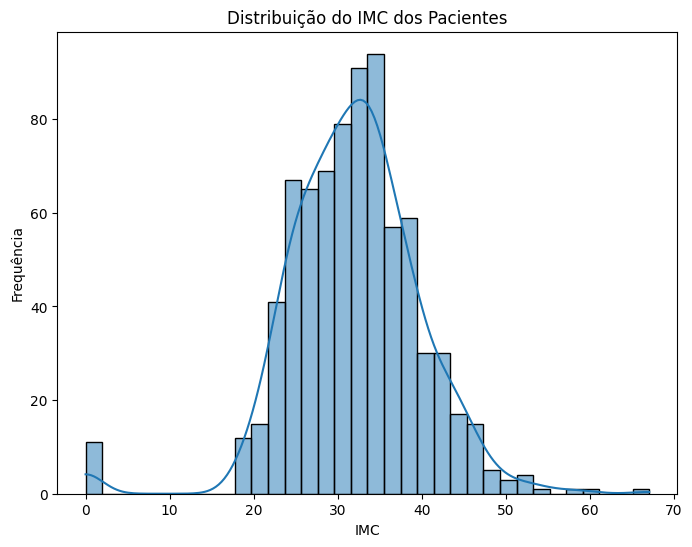

In [ ]:
# Qual a distribuição do IMC na população analisada?
plt.figure(figsize=(8, 6))
sns.histplot(df['IMC'], kde=True)
plt.title('Distribuição do IMC dos Pacientes')
plt.xlabel('IMC')
plt.ylabel('Frequência')
plt.show()

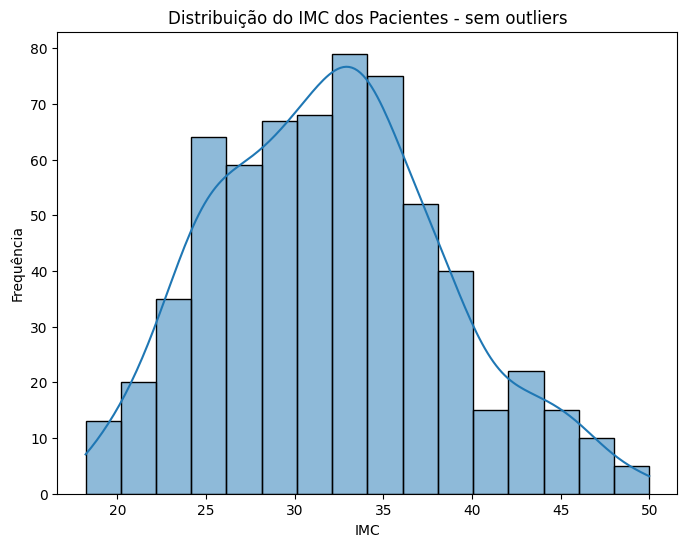

In [25]:
# Qual a distribuição do IMC na população analisada?
plt.figure(figsize=(8, 6))
sns.histplot(df_no_outliers['IMC'], kde=True)
plt.title('Distribuição do IMC dos Pacientes - sem outliers')
plt.xlabel('IMC')
plt.ylabel('Frequência')
plt.show()

In [ ]:
# Medidas de tendência central e dispersão do IMC
print(f"Média do IMC: {df['IMC'].mean()}")
print(f"Mediana do IMC: {df['IMC'].median()}")
print(f"Desvio padrão do IMC: {df['IMC'].std()}")

Média do IMC: 31.992578124999998
Mediana do IMC: 32.0
Desvio padrão do IMC: 7.8841603203754405


In [26]:
# Medidas de tendência central e dispersão do IMC sem outliers
print(f"Média do IMC: {df_no_outliers['IMC'].mean()}")
print(f"Mediana do IMC: {df_no_outliers['IMC'].median()}")
print(f"Desvio padrão do IMC: {df_no_outliers['IMC'].std()}")

Média do IMC: 32.02190923317684
Mediana do IMC: 32.0
Desvio padrão do IMC: 6.427001874041045


### A glicose tem correlação com o resultado da diabetes?


In [27]:
# Calcular a correlação entre a glicose e o resultado da diabetes
correlation_glicose_resultado = df['Glicose'].corr(df['Resultado'])
print(f"Correlação entre Glicose e Resultado: {correlation_glicose_resultado}")

Correlação entre Glicose e Resultado: 0.46658139830687295


In [28]:
correlation_glicose_resultado2 = df_no_outliers['Glicose'].corr(df_no_outliers['Resultado'])
print(f"Correlação entre Glicose e Resultado: {correlation_glicose_resultado2}")

Correlação entre Glicose e Resultado: 0.49594877630264445


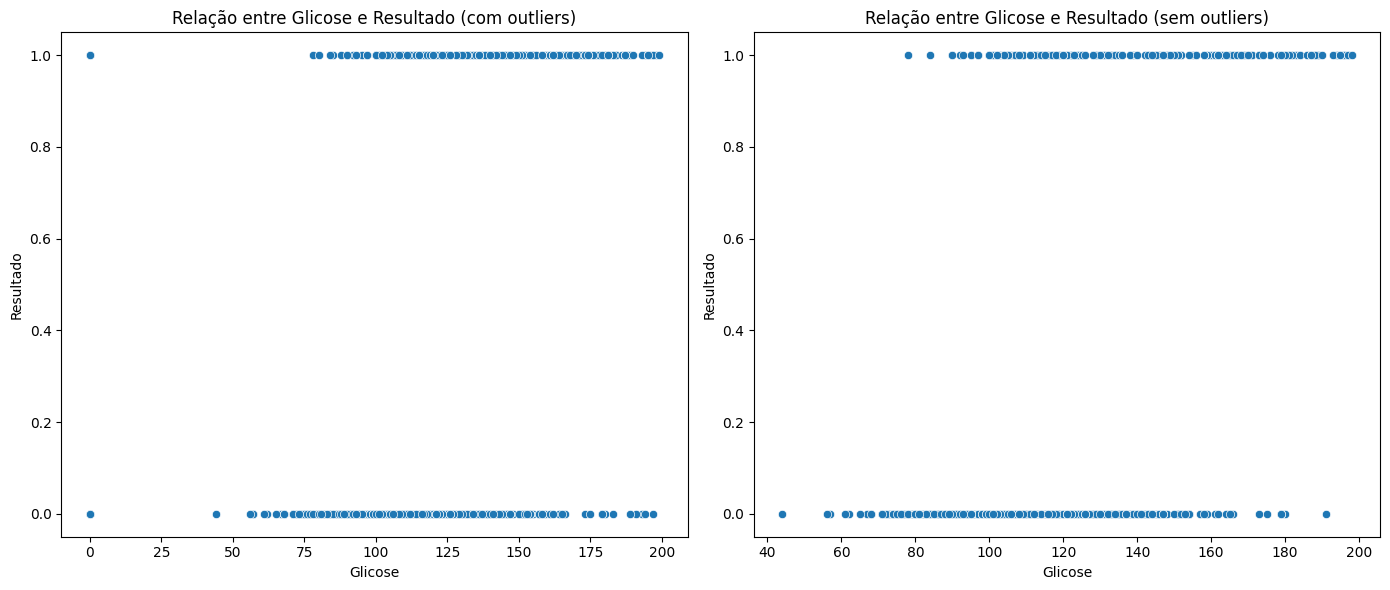

In [30]:
# Criar uma figura com 2 subplots lado a lado
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico 1: Com outliers
sns.scatterplot(ax=axes[0], x='Glicose', y='Resultado', data=df)
axes[0].set_title('Relação entre Glicose e Resultado (com outliers)')
axes[0].set_xlabel('Glicose')
axes[0].set_ylabel('Resultado')

# Gráfico 2: Sem outliers
sns.scatterplot(ax=axes[1], x='Glicose', y='Resultado', data=df_no_outliers)
axes[1].set_title('Relação entre Glicose e Resultado (sem outliers)')
axes[1].set_xlabel('Glicose')
axes[1].set_ylabel('Resultado')

# Ajustar espaçamento
plt.tight_layout()
plt.show()

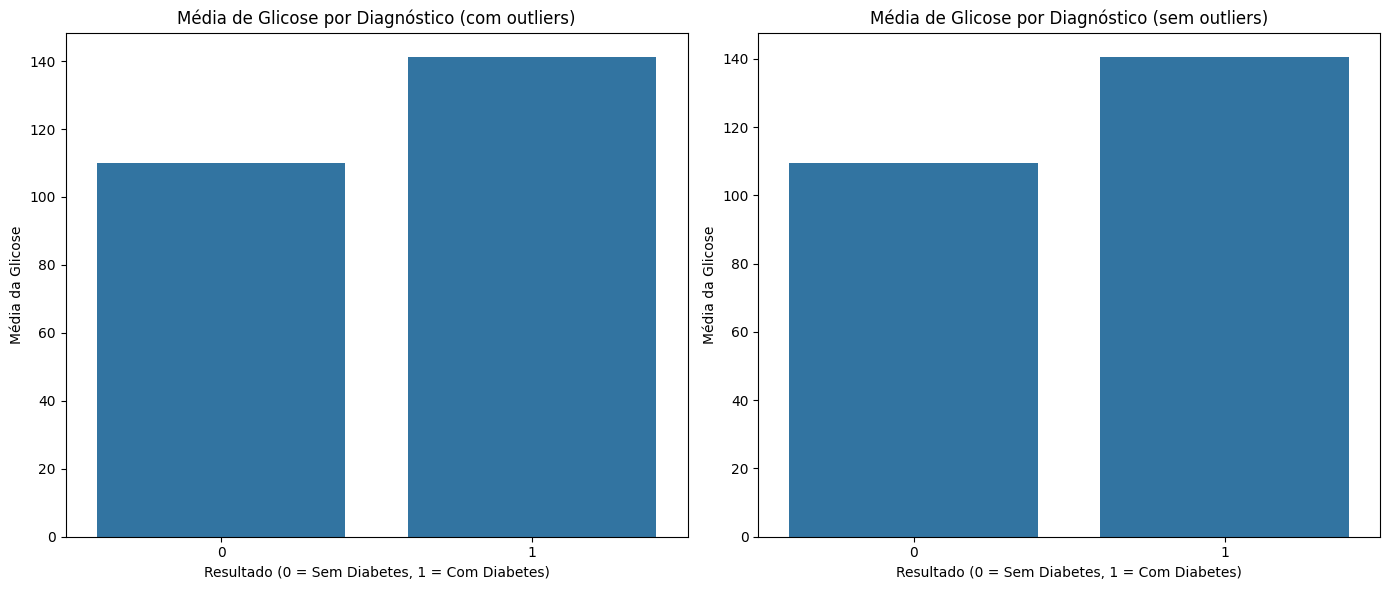

In [33]:
# Criar uma figura com 2 subplots lado a lado
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico 1: Com outliers
sns.barplot(ax=axes[0], x='Resultado', y='Glicose', data=df, errorbar=None)
axes[0].set_title('Média de Glicose por Diagnóstico (com outliers)')
axes[0].set_xlabel('Resultado (0 = Sem Diabetes, 1 = Com Diabetes)')
axes[0].set_ylabel('Média da Glicose')

# Gráfico 2: Sem outliers
sns.barplot(ax=axes[1], x='Resultado', y='Glicose', data=df_no_outliers, errorbar=None)
axes[1].set_title('Média de Glicose por Diagnóstico (sem outliers)')
axes[1].set_xlabel('Resultado (0 = Sem Diabetes, 1 = Com Diabetes)')
axes[1].set_ylabel('Média da Glicose')

# Ajustar espaçamento
plt.tight_layout()
plt.show()

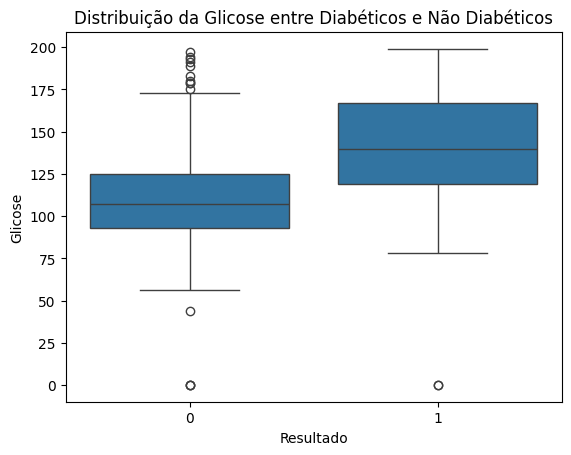

In [ ]:
sns.boxplot(x="Resultado", y="Glicose", data=df)
plt.title("Distribuição da Glicose entre Diabéticos e Não Diabéticos")
plt.show()

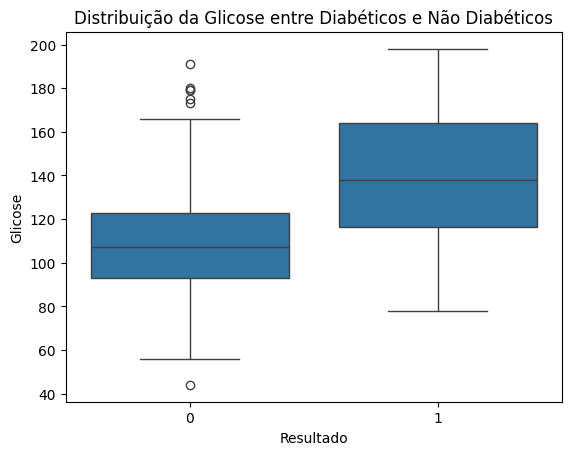

In [34]:
sns.boxplot(x="Resultado", y="Glicose", data=df_no_outliers)
plt.title("Distribuição da Glicose entre Diabéticos e Não Diabéticos")
plt.show()

### Há alguma relação entre IMC e diabetes?


In [35]:
# Calcular a correlação entre o IMC e o resultado da diabetes
correlation_imc_resultado = df['IMC'].corr(df['Resultado'])
print(f"Correlação entre IMC e Resultado: {correlation_imc_resultado}")

Correlação entre IMC e Resultado: 0.29269466264444494


In [36]:
# Calcular a correlação entre o IMC e o resultado da diabetes
correlation_imc_resultado = df_no_outliers['IMC'].corr(df_no_outliers['Resultado'])
print(f"Correlação entre IMC e Resultado: {correlation_imc_resultado}")

Correlação entre IMC e Resultado: 0.27089452521603696


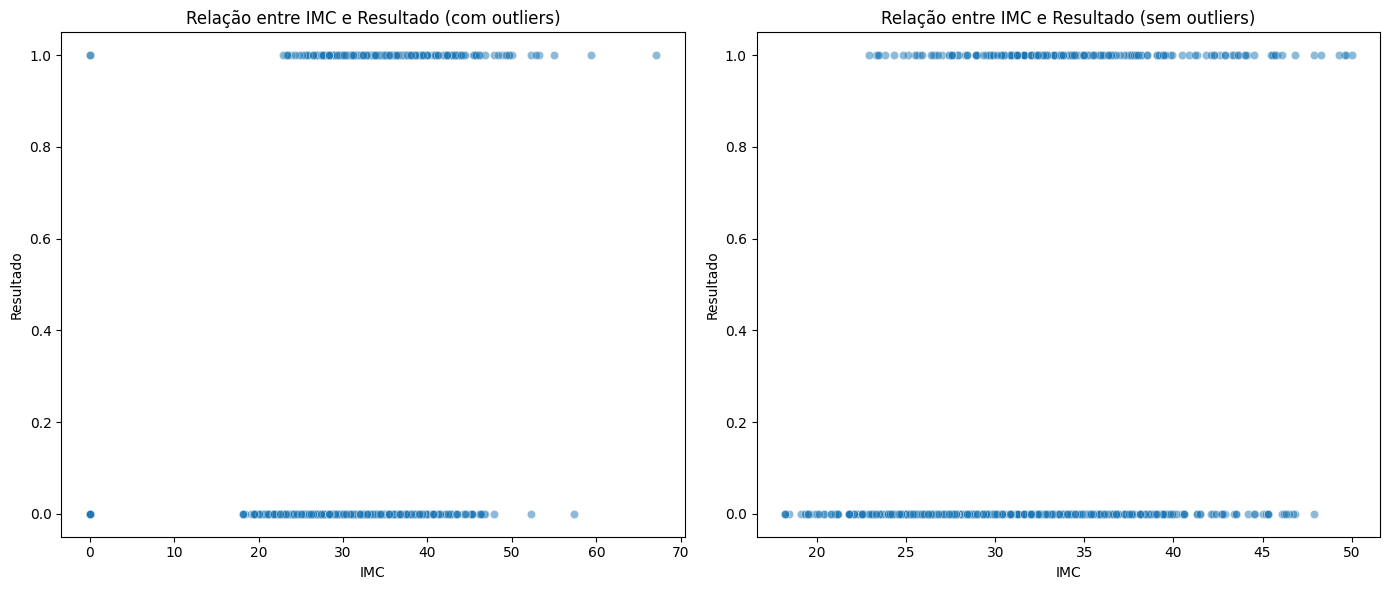

In [37]:
# Criar uma figura com 2 subplots lado a lado
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico 1: Com outliers
sns.scatterplot(ax=axes[0], x='IMC', y='Resultado', data=df, alpha=0.5)
axes[0].set_title('Relação entre IMC e Resultado (com outliers)')
axes[0].set_xlabel('IMC')
axes[0].set_ylabel('Resultado')

# Gráfico 2: Sem outliers
sns.scatterplot(ax=axes[1], x='IMC', y='Resultado', data=df_no_outliers, alpha=0.5)
axes[1].set_title('Relação entre IMC e Resultado (sem outliers)')
axes[1].set_xlabel('IMC')
axes[1].set_ylabel('Resultado')

# Ajustar espaçamento
plt.tight_layout()
plt.show()

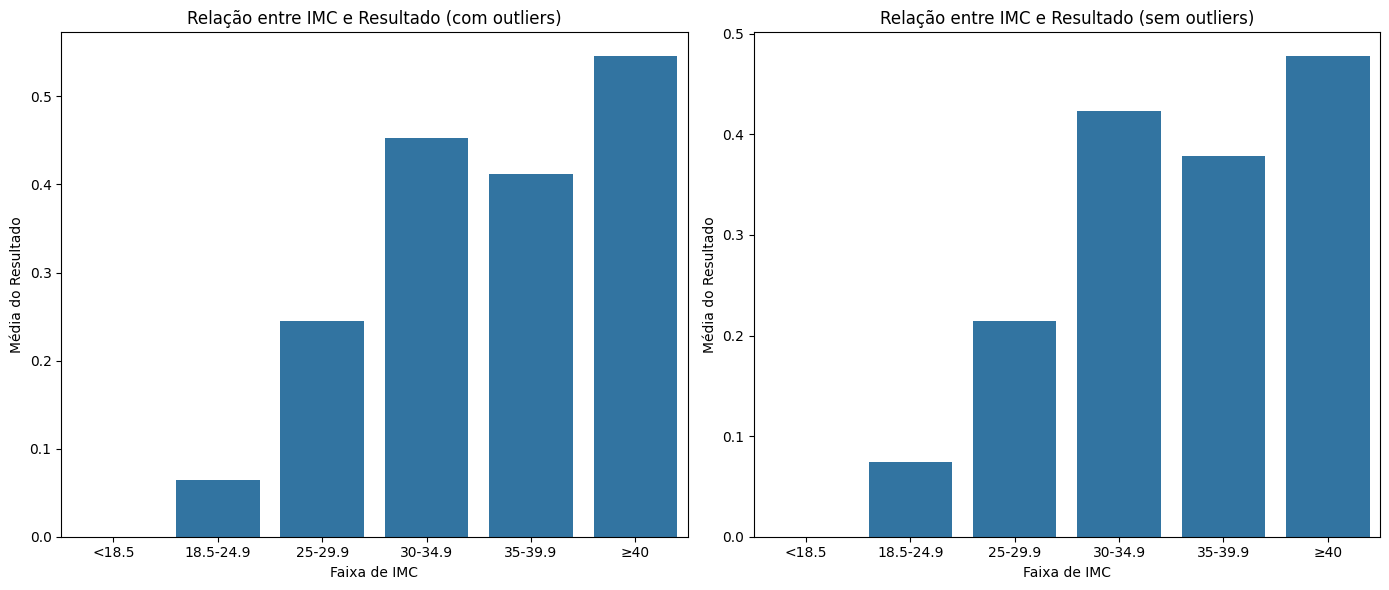

In [40]:
# Criar faixas de IMC
bins = [10, 18.5, 25, 30, 35, 40, 50]  # Definir intervalos
labels = ['<18.5', '18.5-24.9', '25-29.9', '30-34.9', '35-39.9', '≥40']
df['IMC_bin'] = pd.cut(df['IMC'], bins=bins, labels=labels)
df_no_outliers['IMC_bin'] = pd.cut(df_no_outliers['IMC'], bins=bins, labels=labels)

# Criar uma figura com 2 subplots lado a lado
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico 1: Com outliers
sns.barplot(ax=axes[0], x='IMC_bin', y='Resultado', data=df, errorbar=None)
axes[0].set_title('Relação entre IMC e Resultado (com outliers)')
axes[0].set_xlabel('Faixa de IMC')
axes[0].set_ylabel('Média do Resultado')

# Gráfico 2: Sem outliers
sns.barplot(ax=axes[1], x='IMC_bin', y='Resultado', data=df_no_outliers, errorbar=None)
axes[1].set_title('Relação entre IMC e Resultado (sem outliers)')
axes[1].set_xlabel('Faixa de IMC')
axes[1].set_ylabel('Média do Resultado')

# Ajustar espaçamento
plt.tight_layout()
plt.show()

### Pessoas mais velhas têm maior risco de diabetes?

In [ ]:
correlation_idade_resultado = df['Idade'].corr(df['Resultado'])
print(f"Correlação entre Idade e Resultado: {correlation_idade_resultado}")

Correlação entre Idade e Resultado: 0.23835598302719754


In [41]:
correlation_idade_resultado = df_no_outliers['Idade'].corr(df_no_outliers['Resultado'])
print(f"Correlação entre Idade e Resultado: {correlation_idade_resultado}")

Correlação entre Idade e Resultado: 0.26936708331039416


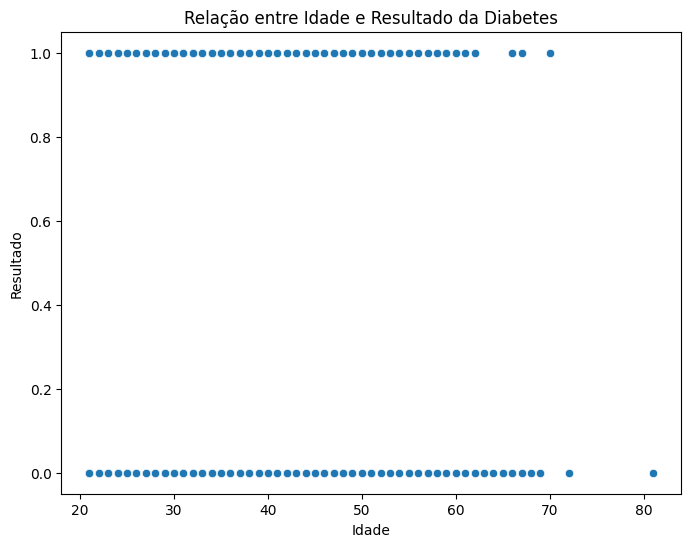

In [ ]:
# Criar um gráfico de dispersão para visualizar a relação
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Idade', y='Resultado', data=df)
plt.title('Relação entre Idade e Resultado da Diabetes')
plt.xlabel('Idade')
plt.ylabel('Resultado')
plt.show()

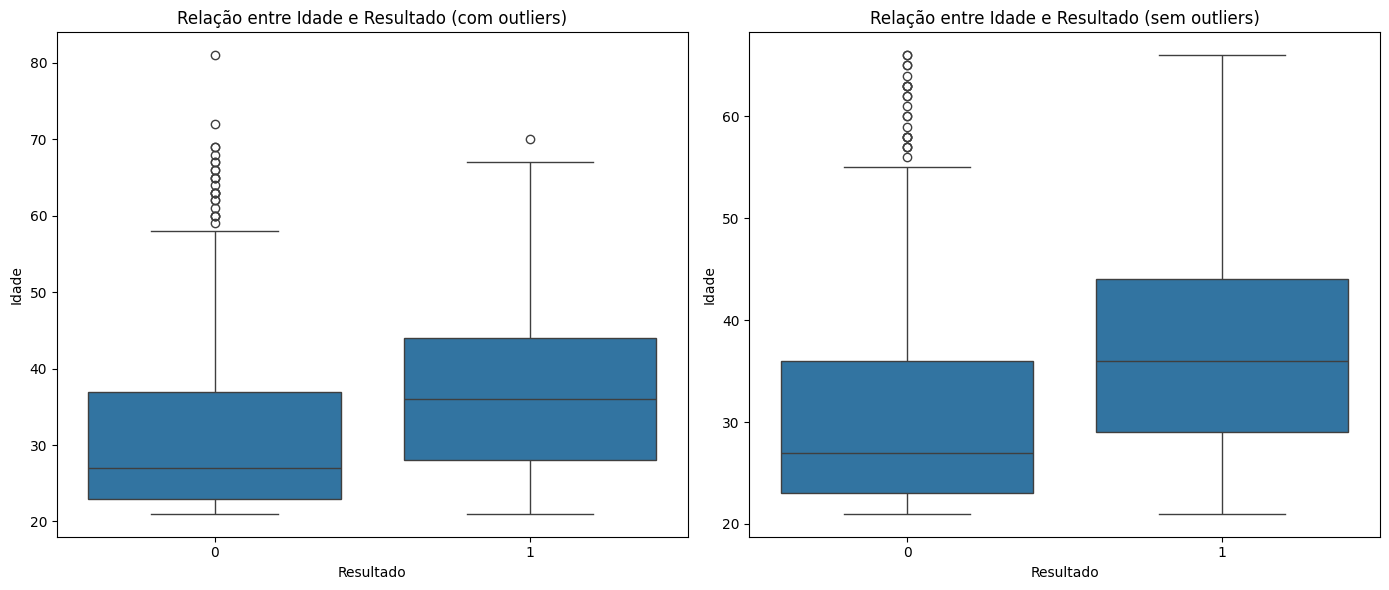

In [43]:
# Criar uma figura com 2 subplots lado a lado
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico 1: Com outliers
sns.boxplot(ax=axes[0], x='Resultado', y='Idade', data=df)
axes[0].set_title('Relação entre Idade e Resultado (com outliers)')
axes[0].set_xlabel('Resultado')
axes[0].set_ylabel('Idade')

# Gráfico 2: Sem outliers
sns.boxplot(ax=axes[1], x='Resultado', y='Idade', data=df_no_outliers)
axes[1].set_title('Relação entre Idade e Resultado (sem outliers)')
axes[1].set_xlabel('Resultado')
axes[1].set_ylabel('Idade')

# Ajustar espaçamento
plt.tight_layout()
plt.show()

### Qual a média de glicose em pessoas com e sem diabetes?


In [44]:
# Agrupar os dados por 'Resultado' e calcular a média da glicose para cada grupo
media_glicose_por_resultado = df.groupby('Resultado')['Glicose'].mean()
media_glicose_por_resultado_new = df_no_outliers.groupby('Resultado')['Glicose'].mean()

In [45]:
# Imprimir os resultados
media_glicose_por_resultado

,Glicose
Resultado,
0,109.980000
1,141.257463


In [46]:
media_glicose_por_resultado_new

,Glicose
Resultado,
0,109.466819
1,140.628713


### Pessoas com diabetes tendem a ter maior IMC?


In [47]:
# Agrupar os dados por 'Resultado' e calcular a média do IMC para cada grupo
media_imc_por_resultado = df.groupby('Resultado')['IMC'].mean()

In [48]:
# Imprimir os resultados
print(media_imc_por_resultado)

Resultado
0    30.304200
1    35.142537
Name: IMC, dtype: float64


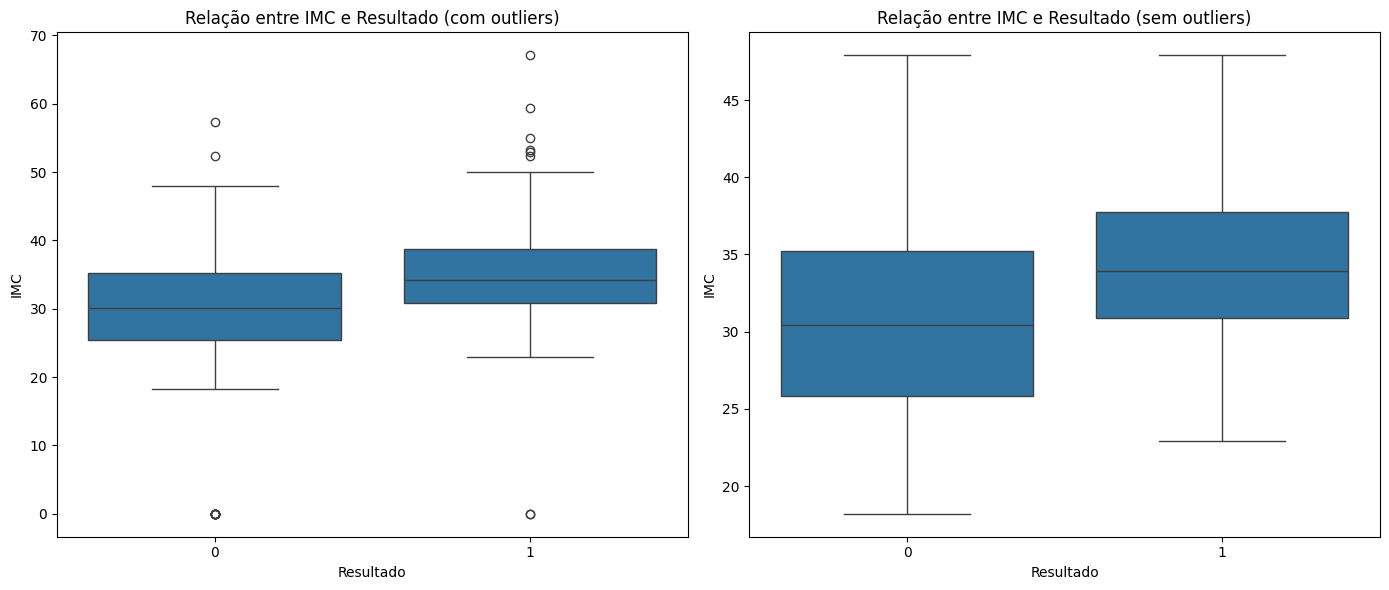

In [23]:
# Criar uma figura com 2 subplots lado a lado
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico 1: Com outliers
sns.boxplot(ax=axes[0], x='Resultado', y='IMC', data=df)
axes[0].set_title('Relação entre IMC e Resultado (com outliers)')
axes[0].set_xlabel('Resultado')
axes[0].set_ylabel('IMC')

# Gráfico 2: Sem outliers
sns.boxplot(ax=axes[1], x='Resultado', y='IMC', data=df_no_outliers, showfliers=False)
axes[1].set_title('Relação entre IMC e Resultado (sem outliers)')
axes[1].set_xlabel('Resultado')
axes[1].set_ylabel('IMC')

# Ajustar espaçamento
plt.tight_layout()
plt.show()

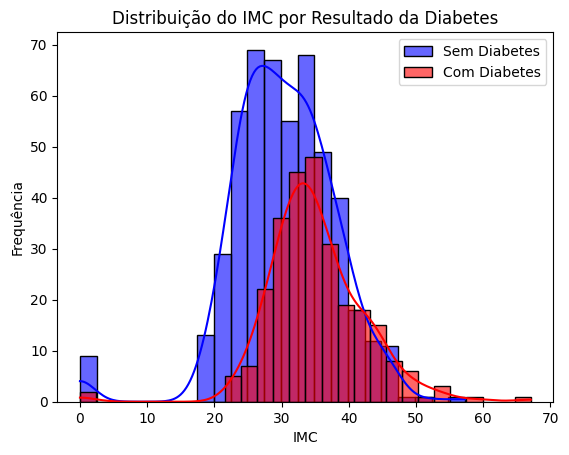

In [24]:
sns.histplot(df[df['Resultado'] == 0]['IMC'], label='Sem Diabetes', kde=True, color='blue', alpha=0.6)
sns.histplot(df[df['Resultado'] == 1]['IMC'], label='Com Diabetes', kde=True, color='red', alpha=0.6)
plt.title('Distribuição do IMC por Resultado da Diabetes')
plt.xlabel('IMC')
plt.ylabel('Frequência')
plt.legend()
plt.show()



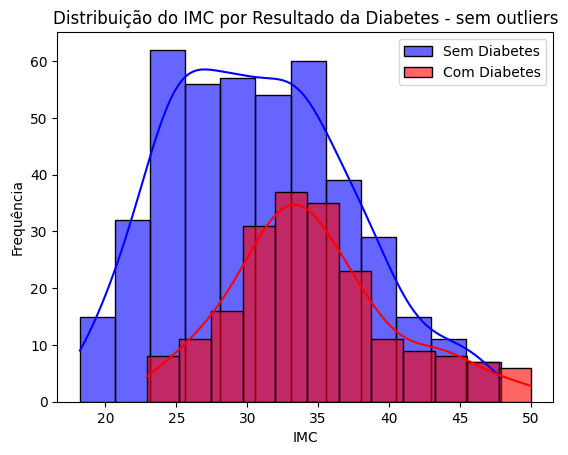

In [25]:
sns.histplot(df_no_outliers[df_no_outliers['Resultado'] == 0]['IMC'], label='Sem Diabetes', kde=True, color='blue', alpha=0.6)
sns.histplot(df_no_outliers[df_no_outliers['Resultado'] == 1]['IMC'], label='Com Diabetes', kde=True, color='red', alpha=0.6)
plt.title('Distribuição do IMC por Resultado da Diabetes - sem outliers')
plt.xlabel('IMC')
plt.ylabel('Frequência')
plt.legend()
plt.show()

O Seaborn Boxplot ainda usa a regra do IQR para definir novos outliers dentro do subconjunto de dados filtrado.

Quando você remove os valores extremos, os quartis e a dispersão dos dados mudam.
Isso pode fazer com que alguns valores, antes considerados normais, agora sejam outliers.
O Seaborn não "sabe" que os dados foram filtrados

Ele recalcula os quartis e define os novos limites baseados na regra:
Alguns pontos ainda podem ficar fora desses novos limites.

### Há diferença na pressão arterial entre os grupos?

In [27]:
# Calcular a média da pressão arterial para cada grupo (diabéticos e não diabéticos)
media_pressao_por_resultado = df.groupby('Resultado')['Pressão'].mean()
print(media_pressao_por_resultado)

Resultado
0    68.184000
1    70.824627
Name: Pressão, dtype: float64


In [26]:
# Calcular a média da pressão arterial para cada grupo (diabéticos e não diabéticos)
media_pressao_por_resultado_new = df_no_outliers.groupby('Resultado')['Pressão'].mean()
print(media_pressao_por_resultado_new)

Resultado
0    70.633867
1    75.089109
Name: Pressão, dtype: float64


In [35]:
# Realizar um teste t para comparar as médias das pressões arteriais entre os grupos
grupo_diabeticos = df[df['Resultado'] == 1]['Pressão']
grupo_nao_diabeticos = df[df['Resultado'] == 0]['Pressão']
t_statistic, p_value = stat.ttest_ind(grupo_diabeticos, grupo_nao_diabeticos)

print(f"Estatística t: {t_statistic}")
print(f"Valor p: {p_value}")

Estatística t: 1.8047023017353887
Valor p: 0.07151390009776082


In [36]:
# Interpretar o resultado do teste t
alpha = 0.05  # Nível de significância
if p_value < alpha:
    print("Há diferença significativa na pressão arterial entre os grupos (p < 0.05).")
else:
    print("Não há diferença significativa na pressão arterial entre os grupos (p >= 0.05).")

Não há diferença significativa na pressão arterial entre os grupos (p >= 0.05).


In [37]:
# Realizar um teste t para comparar as médias das pressões arteriais entre os grupos
grupo_diabeticos = df_no_outliers[df_no_outliers['Resultado'] == 1]['Pressão']
grupo_nao_diabeticos = df_no_outliers[df_no_outliers['Resultado'] == 0]['Pressão']
t_statistic, p_value = stat.ttest_ind(grupo_diabeticos, grupo_nao_diabeticos)

print(f"Estatística t: {t_statistic}")
print(f"Valor p: {p_value}")

Estatística t: 4.818436993642172
Valor p: 1.8104311664236374e-06


In [38]:
# Interpretar o resultado do teste t
alpha = 0.05  # Nível de significância
if p_value < alpha:
    print("Há diferença significativa na pressão arterial entre os grupos (p < 0.05).")
else:
    print("Não há diferença significativa na pressão arterial entre os grupos (p >= 0.05).")

Há diferença significativa na pressão arterial entre os grupos (p < 0.05).


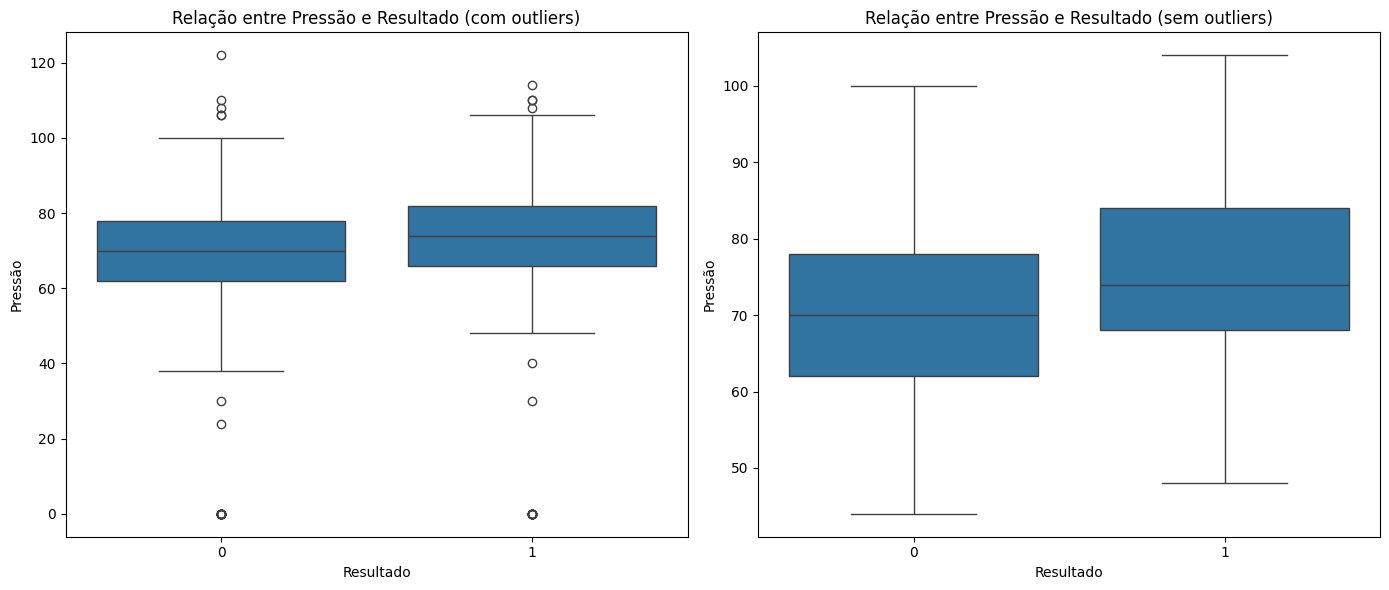

In [39]:
# Criar uma figura com 2 subplots lado a lado
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico 1: Com outliers
sns.boxplot(ax=axes[0], x='Resultado', y='Pressão', data=df)
axes[0].set_title('Relação entre Pressão e Resultado (com outliers)')
axes[0].set_xlabel('Resultado')
axes[0].set_ylabel('Pressão')

# Gráfico 2: Sem outliers
sns.boxplot(ax=axes[1], x='Resultado', y='Pressão', data=df_no_outliers)
axes[1].set_title('Relação entre Pressão e Resultado (sem outliers)')
axes[1].set_xlabel('Resultado')
axes[1].set_ylabel('Pressão')

# Ajustar espaçamento
plt.tight_layout()
plt.show()

### Quais fatores têm maior impacto na presença de diabetes?


In [ ]:
# Análise de correlação com o Resultado para identificar os fatores de maior impacto
correlation_with_result = df.corr()['Resultado'].drop('Resultado')  # Remove a autocorrelação
print(correlation_with_result.sort_values(ascending=False))

Glicose            0.466581
IMC                0.292695
Idade              0.238356
Gravidez           0.221898
Função Diabetes    0.173844
Insulina           0.130548
Espessura Pele     0.074752
Pressão            0.065068
Name: Resultado, dtype: float64


In [40]:
# Análise de correlação com o Resultado para identificar os fatores de maior impacto
correlation_with_result2 = df_no_outliers.corr()['Resultado'].drop('Resultado')  # Remove a autocorrelação
print(correlation_with_result2.sort_values(ascending=False))

Glicose            0.495949
IMC                0.270895
Idade              0.269367
Gravidez           0.236987
Pressão            0.187527
Função Diabetes    0.185850
Insulina           0.108194
Espessura Pele     0.033196
Name: Resultado, dtype: float64


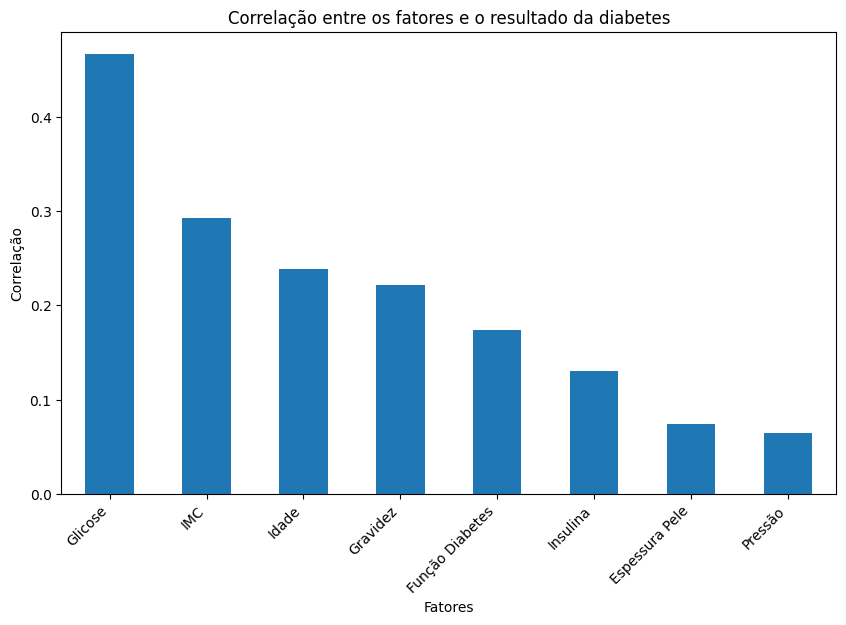

In [ ]:
# Visualizar as correlações com um gráfico de barras
plt.figure(figsize=(10, 6))
correlation_with_result.sort_values(ascending=False).plot(kind='bar')
plt.title('Correlação entre os fatores e o resultado da diabetes')
plt.xlabel('Fatores')
plt.ylabel('Correlação')
plt.xticks(rotation=45, ha='right')
plt.show()

Ao remover os outliers, a ordem dos fatores foi alterada

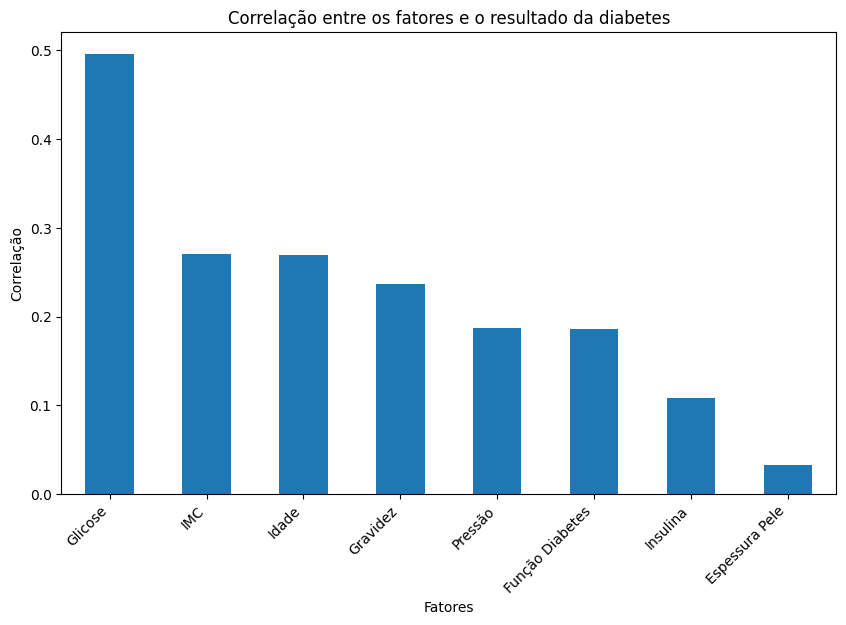

In [41]:
# Visualizar as correlações com um gráfico de barras
plt.figure(figsize=(10, 6))
correlation_with_result2.sort_values(ascending=False).plot(kind='bar')
plt.title('Correlação entre os fatores e o resultado da diabetes')
plt.xlabel('Fatores')
plt.ylabel('Correlação')
plt.xticks(rotation=45, ha='right')
plt.show()

### Existe um valor de glicose acima do qual a maioria das pessoas tem diabetes?


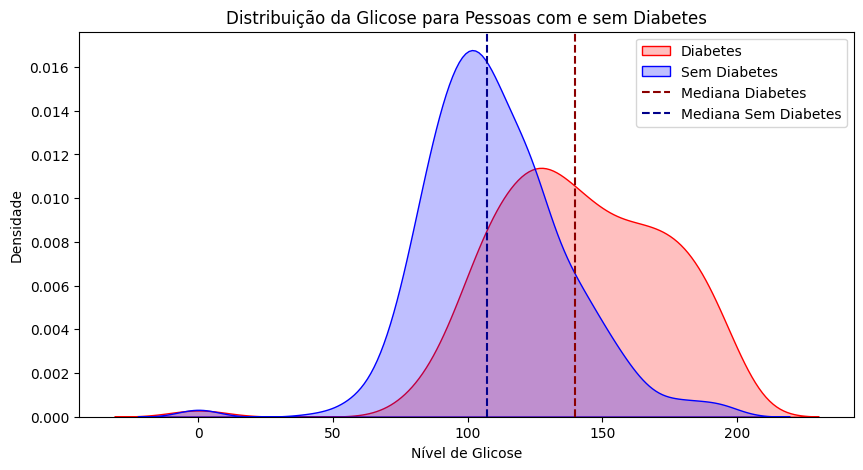

In [42]:
plt.figure(figsize=(10, 5))
sns.kdeplot(df[df['Resultado'] == 1]['Glicose'], label='Diabetes', fill=True, color='red')
sns.kdeplot(df[df['Resultado'] == 0]['Glicose'], label='Sem Diabetes', fill=True, color='blue')

plt.axvline(df[df['Resultado'] == 1]['Glicose'].median(), color='darkred', linestyle='--', label='Mediana Diabetes')
plt.axvline(df[df['Resultado'] == 0]['Glicose'].median(), color='darkblue', linestyle='--', label='Mediana Sem Diabetes')

plt.legend()
plt.xlabel('Nível de Glicose')
plt.ylabel('Densidade')
plt.title('Distribuição da Glicose para Pessoas com e sem Diabetes')
plt.show()

In [ ]:
# Calcular a média da glicose para cada grupo
media_glicose_diabeticos = df[df['Resultado'] == 1]['Glicose'].mean()
media_glicose_nao_diabeticos = df[df['Resultado'] == 0]['Glicose'].mean()
print(f"Média da Glicose em Diabéticos: {media_glicose_diabeticos}")
print(f"Média da Glicose em Não Diabéticos: {media_glicose_nao_diabeticos}")

Média da Glicose em Diabéticos: 141.25746268656715
Média da Glicose em Não Diabéticos: 109.98


In [43]:
# Analisar a glicose em relação a um limiar, por exemplo, 140
limiar_glicose = 150
pessoas_acima_limiar = df[df['Glicose'] > limiar_glicose]
proporcao_diabeticos_acima_limiar = pessoas_acima_limiar[pessoas_acima_limiar['Resultado']==1].shape[0] / pessoas_acima_limiar.shape[0]

print(f"Proporção de diabéticos com glicose acima de {limiar_glicose}: {proporcao_diabeticos_acima_limiar}")


Proporção de diabéticos com glicose acima de 150: 0.75


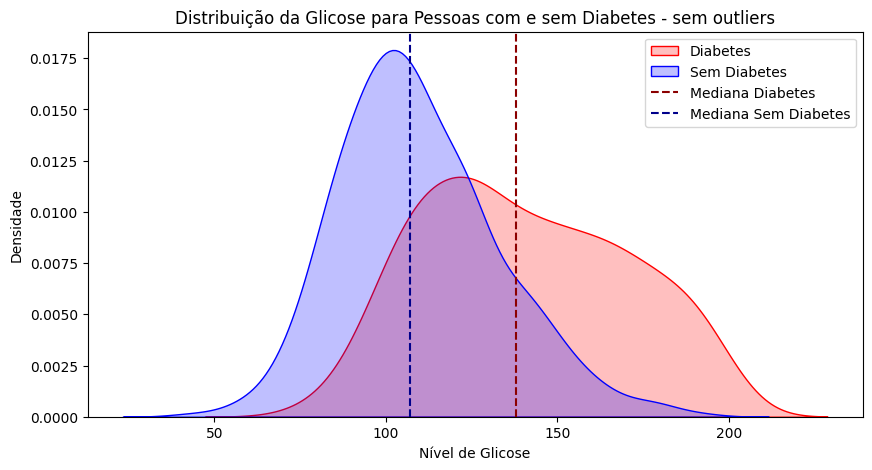

In [44]:
plt.figure(figsize=(10, 5))
sns.kdeplot(df_no_outliers[df_no_outliers['Resultado'] == 1]['Glicose'], label='Diabetes', fill=True, color='red')
sns.kdeplot(df_no_outliers[df_no_outliers['Resultado'] == 0]['Glicose'], label='Sem Diabetes', fill=True, color='blue')

plt.axvline(df_no_outliers[df_no_outliers['Resultado'] == 1]['Glicose'].median(), color='darkred', linestyle='--', label='Mediana Diabetes')
plt.axvline(df_no_outliers[df_no_outliers['Resultado'] == 0]['Glicose'].median(), color='darkblue', linestyle='--', label='Mediana Sem Diabetes')

plt.legend()
plt.xlabel('Nível de Glicose')
plt.ylabel('Densidade')
plt.title('Distribuição da Glicose para Pessoas com e sem Diabetes - sem outliers')
plt.show()

In [45]:
# Calcular a média da glicose para cada grupo
media_glicose_diabeticos1 = df_no_outliers[df_no_outliers['Resultado'] == 1]['Glicose'].mean()
media_glicose_nao_diabeticos1 = df_no_outliers[df_no_outliers['Resultado'] == 0]['Glicose'].mean()
print(f"Média da Glicose em Diabéticos: {media_glicose_diabeticos1}")
print(f"Média da Glicose em Não Diabéticos: {media_glicose_nao_diabeticos1}")

Média da Glicose em Diabéticos: 140.62871287128712
Média da Glicose em Não Diabéticos: 109.46681922196797


In [46]:
# Analisar a glicose em relação a um limiar, por exemplo, 140
limiar_glicose = 150
pessoas_acima_limiar = df_no_outliers[df_no_outliers['Glicose'] > limiar_glicose]
proporcao_diabeticos_acima_limiar1 = pessoas_acima_limiar[pessoas_acima_limiar['Resultado']==1].shape[0] / pessoas_acima_limiar.shape[0]

print(f"Proporção de diabéticos com glicose acima de {limiar_glicose}: {proporcao_diabeticos_acima_limiar1}")

Proporção de diabéticos com glicose acima de 150: 0.7524752475247525


<ipython-input-48-73902a25a7fa>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  proporcao_diabetes = df_no_outliers.groupby('Faixa_Glicose')['Resultado'].mean()


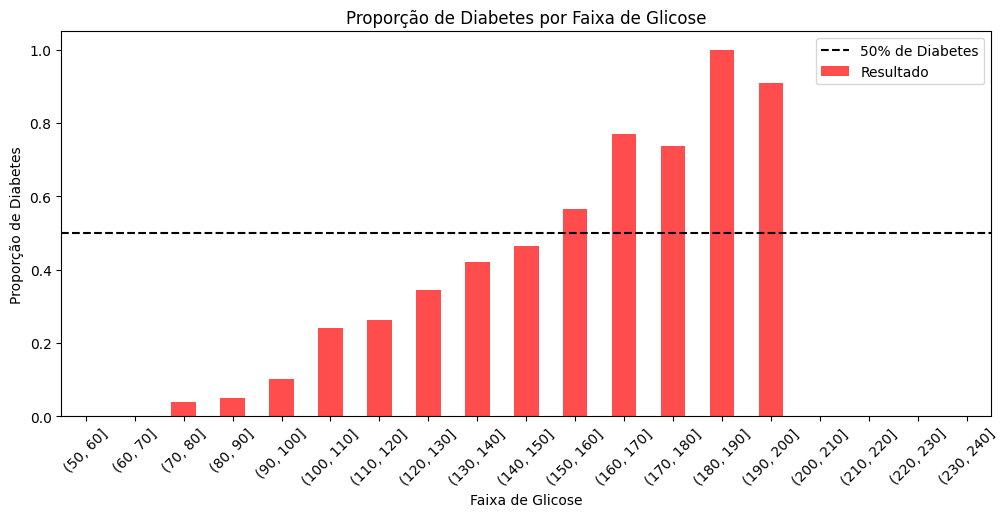

In [48]:
# Criar faixas de glicose
df_no_outliers['Faixa_Glicose'] = pd.cut(df_no_outliers['Glicose'], bins=range(50, 250, 10))

# Calcular a proporção de diabéticos por faixa
proporcao_diabetes = df_no_outliers.groupby('Faixa_Glicose')['Resultado'].mean()

# Plotar
plt.figure(figsize=(12, 5))
proporcao_diabetes.plot(kind='bar', color='red', alpha=0.7)
plt.axhline(0.5, color='black', linestyle='--', label='50% de Diabetes')
plt.xlabel('Faixa de Glicose')
plt.ylabel('Proporção de Diabetes')
plt.title('Proporção de Diabetes por Faixa de Glicose')
plt.xticks(rotation=45)
plt.legend()
plt.show()

### Pacientes com maior número de gestações têm maior chance de desenvolver diabetes?

In [63]:
# Calcular a correlação entre o número de gestações e o resultado da diabetes
correlation_gravidez_resultado = df_no_outliers['Gravidez'].corr(df_no_outliers['Resultado'])
print(f"Correlação entre Gravidez e Resultado: {correlation_gravidez_resultado}")

Correlação entre Gravidez e Resultado: 0.23698680109583525


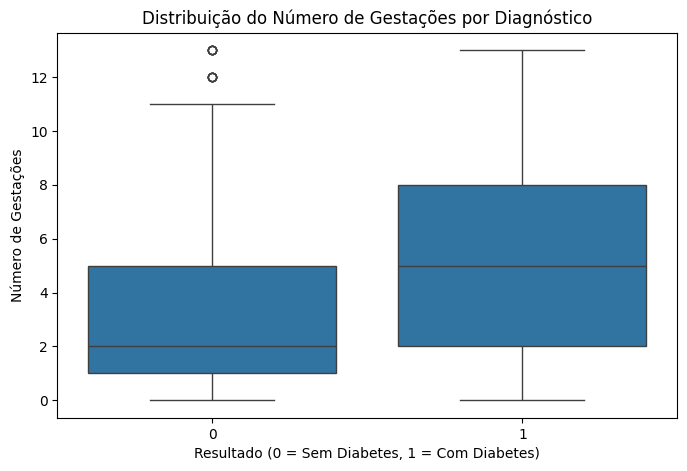

In [64]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Resultado', y='Gravidez', data=df_no_outliers)

plt.xlabel('Resultado (0 = Sem Diabetes, 1 = Com Diabetes)')
plt.ylabel('Número de Gestações')
plt.title('Distribuição do Número de Gestações por Diagnóstico')
plt.show()

<ipython-input-65-0db69d57e474>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  proporcao_diabetes = df_no_outliers.groupby('Faixa_Gestacoes')['Resultado'].mean()


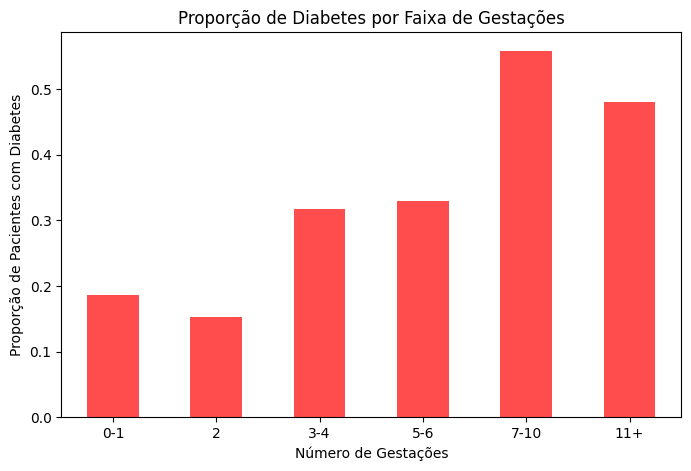

In [65]:
df_no_outliers['Faixa_Gestacoes'] = pd.cut(df_no_outliers['Gravidez'], bins=[0, 1, 2, 4, 6, 10, df_no_outliers['Gravidez'].max()],
                               labels=['0-1', '2', '3-4', '5-6', '7-10', '11+'])

proporcao_diabetes = df_no_outliers.groupby('Faixa_Gestacoes')['Resultado'].mean()

plt.figure(figsize=(8,5))
proporcao_diabetes.plot(kind='bar', color='red', alpha=0.7)

plt.xlabel('Número de Gestações')
plt.ylabel('Proporção de Pacientes com Diabetes')
plt.title('Proporção de Diabetes por Faixa de Gestações')
plt.xticks(rotation=0)
plt.show()

### É possível criar um modelo preditivo para classificar novos pacientes como diabéticos ou não?


In [53]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [54]:
# Separar as features (X) e a variável alvo (y)
X = df_no_outliers.drop('Resultado', axis=1)
y = df_no_outliers['Resultado']

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
# Convert 'Faixa_Glicose' to numeric representation before scaling
X_train['Faixa_Glicose'] = X_train['Faixa_Glicose'].cat.codes
X_test['Faixa_Glicose'] = X_test['Faixa_Glicose'].cat.codes

# Now you can proceed with scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [57]:
# Criar e treinar o modelo RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)


In [59]:
# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo: {accuracy}")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Acurácia do modelo: 0.8046875
              precision    recall  f1-score   support

           0       0.83      0.91      0.87        91
           1       0.71      0.54      0.62        37

    accuracy                           0.80       128
   macro avg       0.77      0.73      0.74       128
weighted avg       0.80      0.80      0.80       128

[[83  8]
 [17 20]]


### Quais variáveis são mais importantes para prever o risco de diabetes?

In [60]:
# Importância das variáveis no modelo treinado
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances_sorted = feature_importances.sort_values(ascending=False)
print(feature_importances_sorted)

Glicose            0.224273
IMC                0.137786
Idade              0.123270
Função Diabetes    0.117992
Faixa_Glicose      0.110460
Gravidez           0.083648
Pressão            0.082873
Espessura Pele     0.068752
Insulina           0.050945
dtype: float64


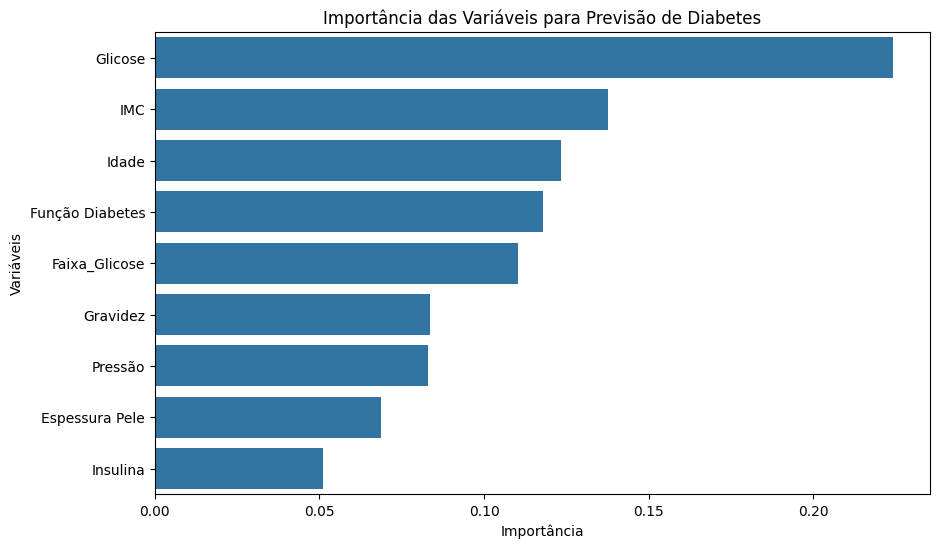

In [61]:
# Plotar a importância das variáveis
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances_sorted.values, y=feature_importances_sorted.index)
plt.title('Importância das Variáveis para Previsão de Diabetes')
plt.xlabel('Importância')
plt.ylabel('Variáveis')
plt.show()